 # Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers

## 1.Problem Definition
> How  well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2.Data
The data is downloaded from the Kaggle Bluebook for Bulldozers competition:

* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

* Train.csv is the training set, which contains data through the end of 2011.
  * 
Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard



## 3.Evaluati

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more  on the evaluation of this project check: 
https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview

**Note:** The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.
on
## 4.Featur

Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary on Google Sheets:
https://docs.google.com/spreadsheets/d/1srNec_hmyHia8ZU4WByewbkyETHPd3Nb38aDabpb7dE/edit?usp=sharinges

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 

In [2]:
df = pd.read_csv("datas/TrainAndValid.csv", low_memory=False)
df.head(3)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

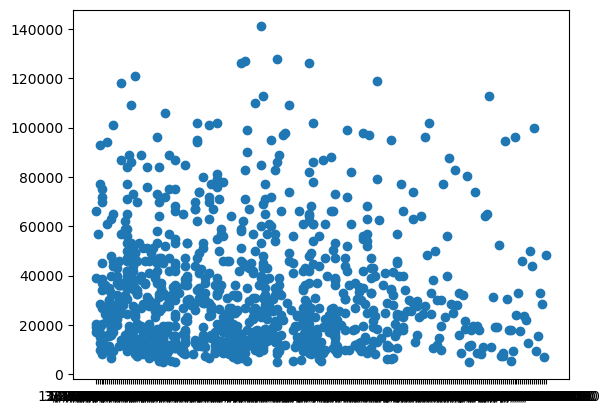

In [4]:
fig, ax = plt.subplots()
ax.scatter(df.saledate[:1000] , df.SalePrice[:1000]);

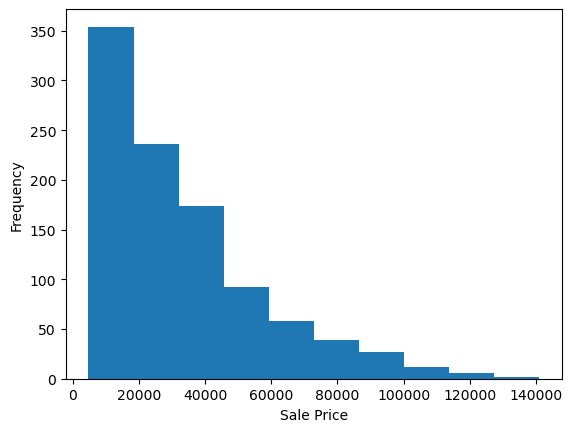

In [5]:
fig, ax = plt.subplots()
ax.hist(df.SalePrice[:1000]);
ax.set(xlabel="Sale Price",
       ylabel="Frequency");

### Parsing dates

When we work with time series data, we want to enrich the time & date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the 'parse_dates' parameter.

In [6]:
# Import the data with telling parse_dates
df = pd.read_csv("datas/TrainAndValid.csv",
                 parse_dates=["saledate"],
                 low_memory=False) # parses the date for usanable format

In [7]:
df.saledate.dtype

dtype('<M8[ns]')

In [8]:
df.saledate[:5]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

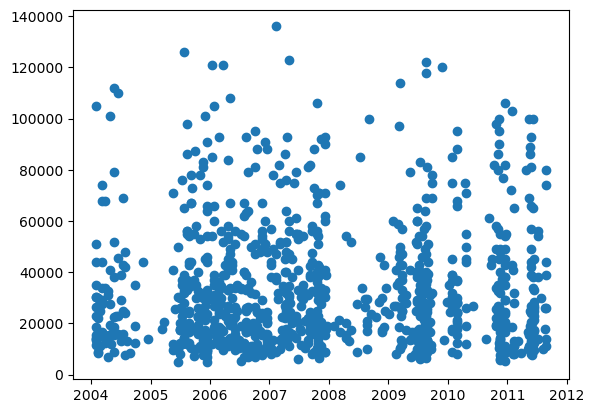

In [9]:
fig, ax = plt.subplots()
ax.scatter(df.saledate[1000:2000], df.SalePrice[1000:2000]);

### Sort DataFrame by saledate

When working with time series data, it's a good idea to sort it by date

In [10]:
df.sort_values(by='saledate', inplace=True)

In [11]:
df.head(2)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


### Make a Copy of the original DataFrame

We make a copy of the original dataframe so when we manipulate the copy, we've still got our original data.

In [12]:
# Make a copy
df_tmp = df.copy()

In [13]:
## Add datetime parameters for saledate column

In [14]:
# We can  use DateTime object's method with .dt extension
df_tmp.saledate.dt.year.head(3)

205615    1989
274835    1989
141296    1989
Name: saledate, dtype: int32

In [15]:
df_tmp.saledate.dt.month.head(2)

205615    1
274835    1
Name: saledate, dtype: int32

In [16]:
# Let's create multiple column. Feature engineering
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear

In [17]:
df_tmp.head(500).T

,205615,274835,141296,212552,62755,54653,81383,204924,135376,113390,...,181432,119059,229214,166632,98508,166633,181458,110530,166236,166726
SalesID,1646770,1821514,1505138,1671174,1329056,1301884,1379228,1645390,1493279,1449549,...,1614653,1459875,1721118,1591999,1415862,1592000,1614710,1444955,1590925,1592229
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0,23500.0,31000.0,11750.0,63000.0,13000.0,...,31000.0,12750.0,10000.0,16500.0,39000.0,17000.0,25000.0,11500.0,12500.0,9750.0
MachineID,1126363,1194089,1473654,1327630,1336053,1182999,1082797,1527216,1363756,1289412,...,1509286,1416161,1152317,1326667,1407213,1461100,1348717,1431803,1447287,1121941
ModelID,8434,10150,4139,8591,4089,4123,7620,8202,2759,3356,...,8371,7428,8908,8247,3357,8247,8265,3369,8247,8180
datasource,132,132,132,132,132,132,132,132,132,132,...,132,132,132,132,132,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
YearMade,1974,1980,1978,1980,1984,1976,1986,1970,1987,1966,...,1980,1977,1981,1974,1977,1974,1978,1971,1973,1975
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,...,1989-02-01 00:00:00,1989-02-01 00:00:00,1989-02-01 00:00:00,1989-02-01 00:00:00,1989-02-01 00:00:00,1989-02-01 00:00:00,1989-02-01 00:00:00,1989-02-01 00:00:00,1989-02-01 00:00:00,1989-02-01 00:00:00


In [18]:
# We have enriched our data. Now we can drop the saledate column.
df_tmp.drop('saledate', axis=1, inplace=True)

In [19]:
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

## 5.Modelling

We've done enough EDA (we could always do more) but let's start to do some model-driven EDA.

In [20]:
# Let's build a machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

## We can not fit the model.
## Because there are lot's of missing values and nonnumerical values

### Convert string to categories

One way we can turn all of our data into numbers is by converting them into pandas categories

We can check what is their type with pd.api.is_typelookingfor_dtype() 

In [21]:
pd.api.types.is_integer_dtype(df_tmp['ModelID'])

True

In [22]:
# pd.api.types.is_string_dtype couldn't work like what i want.
# That's why i used different method.

In [23]:
# Find the colums which contain strings
for label in df_tmp.keys():
    if df_tmp[label].dtype == object:
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [24]:
## We made all the object's type category.
for label in df_tmp.keys():
    if df_tmp[label].dtype == object:
        df_tmp[label] = df_tmp[label].astype("category").cat.as_ordered()

In [25]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [26]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [27]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Thanls to pandas Categories we now have a way ro access all of our data in the form of numbers

But we still have bunch of missing data...

In [28]:
# Check missing data
df_tmp.isnull().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Save preprocessed data


In [29]:
# Export current tmp dataframe
df_tmp.to_csv("datas/train_tmp_new.csv", index=False)

In [30]:
# Import preprocessed data
df_tmp = pd.read_csv("datas/train_tmp_new.csv", low_memory=False)
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [31]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Filling missin values

### Fill numerical missing values first

In [32]:
for label in df_tmp.keys():
    if df_tmp[label].dtype != object:
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [33]:
for label in df_tmp.keys():
    if df_tmp[label].dtype != object:
        if pd.isnull(df_tmp[label]).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [34]:
# Fill missin values with the median
for label in df_tmp.keys():
    if df_tmp[label].dtype != object:
        if pd.isnull(df_tmp[label]).sum():
            # Add a binary column which tell us if the data was missing or not
            df_tmp[label+"_is_missing"] = pd.isnull(df_tmp[label]) # We filled with true or false
            # Fill missing numeric values with median
            df_tmp[label] = df_tmp[label].fillna(df_tmp[label].median())

In [35]:
for label in df_tmp.keys():
    if df_tmp[label].dtype != object:
        if pd.isnull(df_tmp[label]).sum():
            print(label)

In [36]:
# There is no missing values in numerical columns
# Check to see how many examples were missing
df_tmp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

### Filling and turning categorical variables into numbers

In [37]:
## We made all the object's type category.
for label in df_tmp.keys():
    if df_tmp[label].dtype == object:
        df_tmp[label] = df_tmp[label].astype("category").cat.as_ordered()

In [38]:
# Check for columns which aren't numeric
for label in df_tmp.keys():
    if df_tmp[label].dtype == "category":
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [39]:
for label in df_tmp.keys():
    if df_tmp[label].dtype == "category":
        # Add a binary column which tell us if the data was missing or not
        df_tmp[label+"_is_missing"] = pd.isnull(df_tmp[label])
        # Fill missing values and convert all them numeric
        df_tmp[label] = df_tmp[label].cat.codes+1


In [40]:
# Shows us what we do !
pd.Categorical(df_tmp["state"]).codes+1

array([44,  9,  9, ...,  5,  5,  5], dtype=int8)

In [41]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

Now that all of data is numeric as well as our dataframe has no missing values, we should be able to build a machine learning model.

In [42]:
len(df_tmp)

412698

In [43]:
%%time 
## Provide caluculate time

# Instantiate model
model = RandomForestRegressor(random_state=42,
                      n_jobs=-1)
# Fit the model
model.fit(df_tmp.drop('SalePrice', axis=1), df_tmp.SalePrice)


CPU times: total: 21min 7s
Wall time: 1min 58s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [44]:
model.score(df_tmp.drop('SalePrice', axis=1), df_tmp.SalePrice)

0.9875468079970562

**Question:** Why doesb't above metric hold water(Why isn't the metric reliable)

Because that data took same data for testing as same as training data

### Splitting data into train/validation sets

In [45]:
df_tmp.saleYear.value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [46]:
# Split into train and test data
trainData = df_tmp[df_tmp.saleYear != 2012]
valData = df_tmp[df_tmp.saleYear == 2012]

In [48]:
# Split into X and y

X_train, y_train = trainData.drop('SalePrice', axis=1),  trainData.SalePrice
X_val, y_val = valData.drop('SalePrice', axis=1),  valData.SalePrice

In [49]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((401125, 102), (401125,), (11573, 102), (11573,))

## Building an evaluation function

In [50]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels

def show_scores(model):
    y_train_preds = model.predict(X_train)
    y_evalu_preds = model.predict(X_val)
    results = {"Mean Absoulate Error(MAE) Train ": mean_absolute_error(y_train, y_train_preds),
               "Mean Absoulate Error(MAE) Val ": mean_absolute_error(y_val, y_evalu_preds),
               "Root Mean Squared Log(RMSLE) Train ": rmsle(y_train, y_train_preds),
               "Root Mean Squared Log(RMSLE) Val ": rmsle(y_val, y_evalu_preds),
               "R2 Score (R2) Train ": r2_score(y_train, y_train_preds),
               "R2 Score (R2) Val ": r2_score(y_val, y_evalu_preds)}
    return results


## Testing our model on a subset(to tune the hyperparameters)

In [51]:
%%time
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)
model.fit(X_train, y_train)

CPU times: total: 20min 44s
Wall time: 2min


RandomForestRegressor(n_jobs=-1, random_state=42)

In [52]:
model.score(X_val, y_val)

0.8727175969771312

In [53]:
# Change max samples value
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)

In [54]:
%%time
# Cutting down on the max number of samples each estimator can see improves training time
model.fit(X_train, y_train)

CPU times: total: 40.1 s
Wall time: 5.06 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [55]:
show_scores(model)

{'Mean Absoulate Error(MAE) Train ': 5561.2988092240585,
 'Mean Absoulate Error(MAE) Val ': 7177.26365505919,
 'Root Mean Squared Log(RMSLE) Train ': 0.257745378256977,
 'Root Mean Squared Log(RMSLE) Val ': 0.29362638671089003,
 'R2 Score (R2) Train ': 0.8606658995199189,
 'R2 Score (R2) Val ': 0.8320374995090507}

In [56]:
%%time
# Using RandomizedSerachCv for tuning hyperparameter
from sklearn.model_selection import RandomizedSearchCV

# Creating grid
rf_grid ={
 'max_depth': [10, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [90,100,200],
 "max_samples": [10000]}

# Creating RandomizedSearchCV
rd_searCV_randomforest = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42,
                                    n_jobs=-1),
    param_distributions=rf_grid,
    n_iter=4,
    verbose=True,
    cv=5)

# Fit the new model
rd_searCV_randomforest.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\Hp\Desktop\bulldozer-price-prediction-project\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Hp\Desktop\bulldozer-price-prediction-project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Hp\Desktop\bulldozer-price-prediction-project\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Hp\Desktop\bulldozer-price-prediction-project\env\Lib\site-packages

CPU times: total: 48.4 s
Wall time: 8.92 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=4,
                   param_distributions={'max_depth': [10, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [90, 100, 200]},
                   verbose=True)

In [57]:
show_scores(rd_searCV_randomforest)

{'Mean Absoulate Error(MAE) Train ': 7310.18171277426,
 'Mean Absoulate Error(MAE) Val ': 8859.36021611939,
 'Root Mean Squared Log(RMSLE) Train ': 0.3250092639266824,
 'Root Mean Squared Log(RMSLE) Val ': 0.36147717746543817,
 'R2 Score (R2) Train ': 0.7753216543730135,
 'R2 Score (R2) Val ': 0.7667867751976705}

### Train a model with the best hyperparamters
**Note:** Theses were found after 100 iterations of RandomizedSearchCV

In [58]:
%%time

# Most ideal hyperparamters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42)
# Fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: total: 4min 13s
Wall time: 25.8 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [59]:
# Scores for ideal_model (trained on all the data) 
show_scores(ideal_model)

{'Mean Absoulate Error(MAE) Train ': 2953.8161137163484,
 'Mean Absoulate Error(MAE) Val ': 5951.247761444453,
 'Root Mean Squared Log(RMSLE) Train ': 0.14469006962371858,
 'Root Mean Squared Log(RMSLE) Val ': 0.24524163989538328,
 'R2 Score (R2) Train ': 0.9588145522577225,
 'R2 Score (R2) Val ': 0.8818019502450094}

In [60]:
# Scores on rs_model (only trained on ~10,000 examples)
show_scores(rd_searCV_randomforest)

{'Mean Absoulate Error(MAE) Train ': 7310.18171277426,
 'Mean Absoulate Error(MAE) Val ': 8859.36021611939,
 'Root Mean Squared Log(RMSLE) Train ': 0.3250092639266824,
 'Root Mean Squared Log(RMSLE) Val ': 0.36147717746543817,
 'R2 Score (R2) Train ': 0.7753216543730135,
 'R2 Score (R2) Val ': 0.7667867751976705}

In [61]:
# Scores on model (without prameters)
show_scores(model)

{'Mean Absoulate Error(MAE) Train ': 5561.2988092240585,
 'Mean Absoulate Error(MAE) Val ': 7177.26365505919,
 'Root Mean Squared Log(RMSLE) Train ': 0.257745378256977,
 'Root Mean Squared Log(RMSLE) Val ': 0.29362638671089003,
 'R2 Score (R2) Train ': 0.8606658995199189,
 'R2 Score (R2) Val ': 0.8320374995090507}

## Make Prediction on test Data

In [62]:
# Import the test data
df_test = pd.read_csv("datas/Test.csv",
                      low_memory=False,
                      parse_dates=["saledate"])
df_test.head(3)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


### Preprocessing the data (getting the test dataset in the same format as training dataset)

In [63]:
def preprocess_data(df):
    # Let's create multiple column. Feature engineering
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
 
    # We have enriched our data. Now we can drop the saledate column.
    df.drop('saledate', axis=1, inplace=True)

    # Fill missin values with the median
    for label in df.keys():
        if df[label].dtype != object:
            if pd.isnull(df[label]).sum():
                # Add a binary column which tell us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(df[label]) # We filled with true or false
                # Fill missing numeric values with median
                df[label] = df[label].fillna(df[label].median())

    ## We made all the object's type category.
    for label in df.keys():
        if df[label].dtype == object:
            df[label] = df[label].astype("category").cat.as_ordered()

    for label in df.keys():
        if df[label].dtype == "category":
            # Add a binary column which tell us if the data was missing or not
            df[label+"_is_missing"] = pd.isnull(df[label])
            # Fill missing values and convert all them numeric
            df[label] = df[label].cat.codes+1

    return df

In [64]:
df_test = preprocess_data(df_test)

In [65]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [67]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [68]:
# Manually adjust df_test to have auctioneerID_is_missing column
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [86]:
# We should make column in the same order. This is the way. 
df_test_sorted = df_test[X_train.columns]

In [87]:
### Now we should check wheter they are in the same order or not !

In [88]:
df_test_sorted.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,False
Blade_Type_is_missing,True,True,True,True,False
Travel_Controls_is_missing,True,True,True,True,False
Differential_Type_is_missing,True,False,True,True,True


In [89]:
X_train.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


Finally now our test dataframe has the same features as our training dataframe, we can make predictions!

In [90]:
# Make predictions on the test data
test_preds = ideal_model.predict(df_test_sorted) 

In [91]:
test_preds

array([17030.00927386, 14355.53565165, 46623.08774286, ...,
       11964.85073347, 16496.71079281, 27119.99044029])

We've made some predictions but they're not in the same format Kaggle asking for:
https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview

In [93]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test_sorted["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,17030.009274
1,1227844,14355.535652
2,1227847,46623.087743
3,1227848,71680.261335
4,1227863,61762.999424
...,...,...
12452,6643171,39966.363007
12453,6643173,12049.704433
12454,6643184,11964.850733
12455,6643186,16496.710793


In [94]:
# Export prediction data
df_preds.to_csv("datas/bluebook_for_bulldozer_test_predictions_I_Made.csv", index=False)

### Feature Importance

Which part of the data lead these predictions

Feature impotance seeks to figure out which different attributes of the data were most importance when it comes to predicting the **target variable**(SalePrice)

In [100]:
# Find feature importance of our best model
len(ideal_model.feature_importances_)

102

In [103]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()

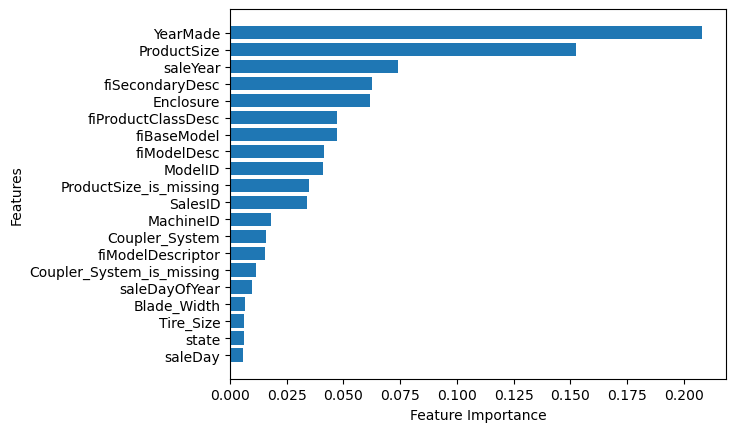

In [104]:
plot_features(X_train.columns, ideal_model.feature_importances_)

**Question to finish:** Why might knowing the feature importances of a trained machine learning model be helpful?

**Final challange:** What other machine learning models could you try on our dataset?

Try yo look at something like CatBoost.ai or XGBoosst.ai